In [1]:
%matplotlib notebook
import tensorwatch as tw

In [2]:
client = tw.WatcherClient()
stream = client.create_stream(expr='lambda v:(v.i, v.sum)')

In [3]:
text_vis = tw.Visualizer(stream)
text_vis.show()

<IPython.core.display.Javascript object>


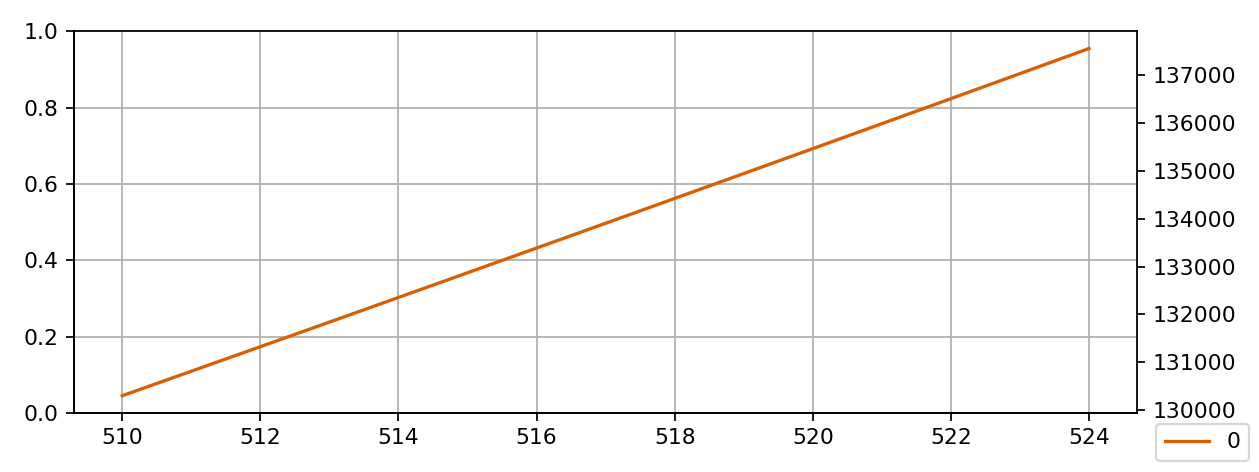

In [4]:
line_plot = tw.Visualizer(stream, vis_type='line')
line_plot.show()

In [5]:
summary = tw.Visualizer(stream, vis_type='summary', cell=text_vis)
summary.show()

In [6]:
plotly_line = tw.Visualizer(stream, vis_type='plotly-line')
plotly_line.show()

    'data': [{'line': {'color': 'rgb(31, 119, 180)'},
              'mode': 'lin…